# X-Ray Pneumonia Detection Using CNN

**Dataset**

Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification

https://data.mendeley.com/datasets/rscbjbr9sj/2

In [ ]:
# !wget https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/f12eaf6d-6023-432f-acc9-80c9d7393433/file_downloaded

In [ ]:
# !unzip file_downloaded

### Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

## Data Preprocessing

In [4]:
dim = (150, 150, 3)
target_size = dim[:2]
batch_size = 32
epochs = 10

### Generating images for the Training set

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

### Generating images for the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

### Creating the Training set

In [7]:
training_set = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                 target_size = target_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

Found 5232 images belonging to 2 classes.


### Creating the Test set

In [8]:
test_set = test_datagen.flow_from_directory('/content/chest_xray/test',
                                            target_size = target_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 624 images belonging to 2 classes.


### Data Exploration

In [9]:
# Data labels
classes = training_set.class_indices

In [50]:
# Displaying basic data

print('Image Size (Pixels):', target_size)
print('Color Mode:', training_set.color_mode)
print('Training set:', training_set.n, 'images')
print('Test set:', test_set.n, 'images')
print('Classes:', classes)

Image Size (Pixels): (150, 150)
Color Mode: rgb
Training set: 5232 images
Test set: 624 images
Classes: {'NORMAL': 0, 'PNEUMONIA': 1}


In [51]:
encoding = {v: k for k, v in classes.items()}
encoding

{0: 'NORMAL', 1: 'PNEUMONIA'}

### Data Visualization

NORMAL: 1349
PNEUMONIA: 3883


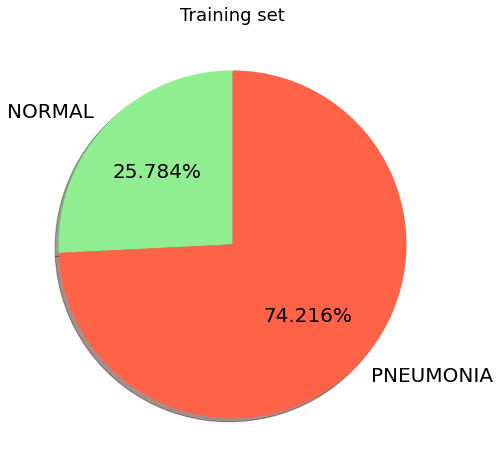

In [56]:
neg = training_set.classes[training_set.classes == 0].shape[0]
pos = training_set.classes[training_set.classes == 1].shape[0]

print(encoding[0], neg, sep=': ')
print(encoding[1], pos, sep=': ')

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Training set', size=18)
plt.pie([neg, pos], labels=[encoding[0], encoding[1]], colors=['lightgreen', 'tomato'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

NORMAL: 234
PNEUMONIA: 390


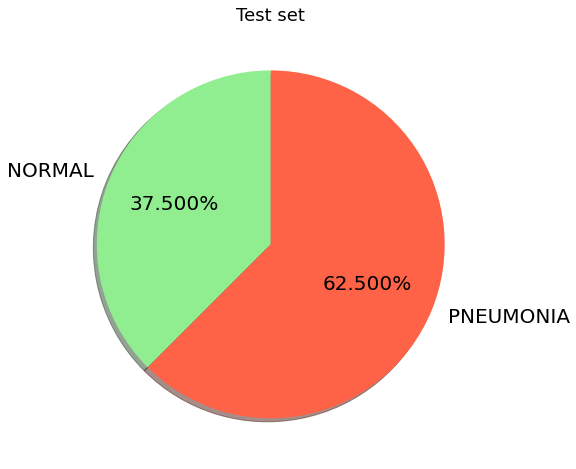

In [57]:
neg = test_set.classes[test_set.classes == 0].shape[0]
pos = test_set.classes[test_set.classes == 1].shape[0]

print(encoding[0], neg, sep=': ')
print(encoding[1], pos, sep=': ')

plt.figure(figsize=(12, 8))
font = {'weight': 'normal','size': 20}
plt.rc('font', **font)
plt.title('Test set', size=18)
plt.pie([neg, pos], labels=[encoding[0], encoding[1]], colors=['lightgreen', 'tomato'], autopct='%1.3f%%', shadow=True, startangle=90)
plt.show()

In [102]:
# Loading some images
images1, labels1 = test_set[0]
images2, labels2 = test_set[-2]

images = np.concatenate([images1, images2])
labels = np.concatenate([labels1, labels2])

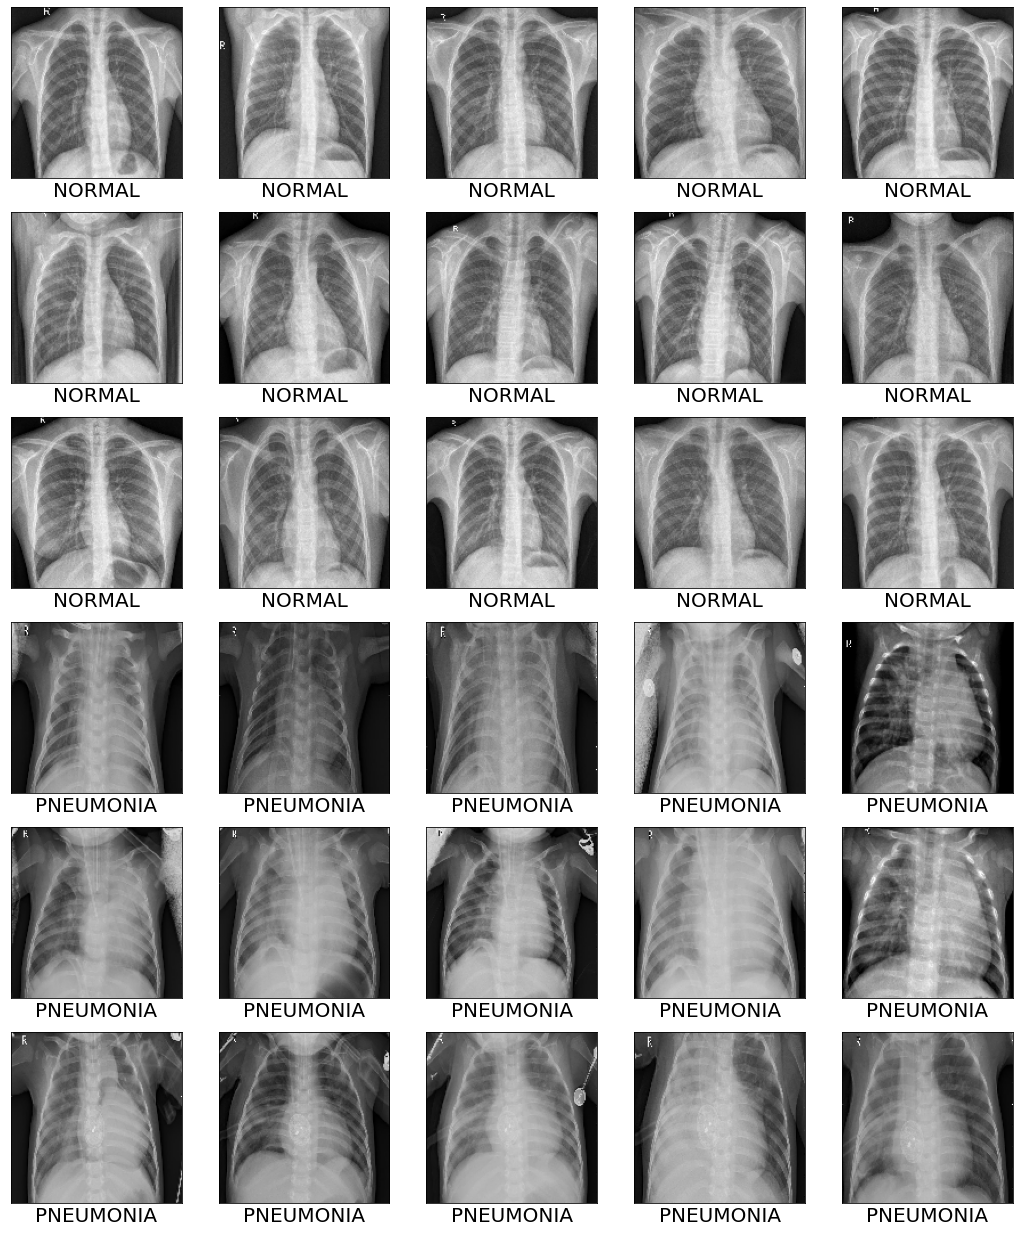

In [127]:
plt.figure(figsize=(18, 22))

j = 1
for i in list(range(15)) + list(range(-15, 0)):
    plt.subplot(6, 5, j)
    plt.xticks([])
    plt.yticks([])

    lbl = int(labels[i])
    plt.xlabel(encoding[lbl])
    plt.imshow(images[i])

    j += 1
plt.show()

## Building the CNN

### Initialising the CNN

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout

In [15]:
cnn = Sequential()

### Convolution and Pooling

In [16]:
cnn.add(Conv2D(filters=8, kernel_size=3, padding="same", activation="relu", input_shape=dim))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [17]:
cnn.add(Conv2D(filters=16, kernel_size=3, padding="same", activation="relu", input_shape=dim))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [18]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=dim))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [19]:
cnn.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu", input_shape=dim))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [20]:
cnn.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu", input_shape=dim))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Flattening

In [21]:
cnn.add(Flatten())

### Full Connection

In [22]:
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=64, activation='relu'))

### Output Layer

In [23]:
cnn.add(Dense(units=1, activation='sigmoid'))

## Training the CNN

### Compiling the CNN

In [24]:
cnn.compile(optimizer = 'adam', 
            loss = 'binary_crossentropy', 
            metrics = ['accuracy'])

In [25]:
# Neural Network summary

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 8)       224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        1

### Training the CNN on the Training set and evaluating it on the Test set

In [26]:
history = cnn.fit(training_set,
                  validation_data = test_set,
                  epochs = epochs)

Epoch 1/10
164/164 [==============================] - 75s 457ms/step - loss: 0.3999 - accuracy: 0.8230 - val_loss: 0.6249 - val_accuracy: 0.7580
Epoch 2/10
164/164 [==============================] - 74s 452ms/step - loss: 0.2262 - accuracy: 0.9060 - val_loss: 0.6230 - val_accuracy: 0.7147
Epoch 3/10
164/164 [==============================] - 73s 447ms/step - loss: 0.1920 - accuracy: 0.9256 - val_loss: 0.3189 - val_accuracy: 0.8878
Epoch 4/10
164/164 [==============================] - 72s 439ms/step - loss: 0.1689 - accuracy: 0.9333 - val_loss: 0.6020 - val_accuracy: 0.8205
Epoch 5/10
164/164 [==============================] - 72s 437ms/step - loss: 0.1524 - accuracy: 0.9398 - val_loss: 0.6025 - val_accuracy: 0.8013
Epoch 6/10
164/164 [==============================] - 71s 434ms/step - loss: 0.1387 - accuracy: 0.9430 - val_loss: 0.3399 - val_accuracy: 0.9071
Epoch 7/10
164/164 [==============================] - 70s 429ms/step - loss: 0.1288 - accuracy: 0.9530 - val_loss: 0.4082 - val_ac

### Model Evaluation

In [36]:
def report(y_test, y_pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
    print('Precision:', precision_score(y_test, y_pred), sep='\t')
    print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
    print('F1:', f1_score(y_test, y_pred), sep='\t\t')
    print('\n')

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
    plt.show()

In [37]:
cnn.evaluate(test_set)

20/20 [==============================] - 4s 208ms/step - loss: 0.2333 - accuracy: 0.9311


[0.2332904040813446, 0.9310897588729858]

In [38]:
# Predicting the Test set results

y_pred = cnn.predict(test_set, verbose=1) 
y_pred = y_pred > 0.5

20/20 [==============================] - 4s 208ms/step


Accuracy:	0.9310897435897436
Precision:	0.9221411192214112
Recall:		0.9717948717948718
F1:		0.9463171036204744




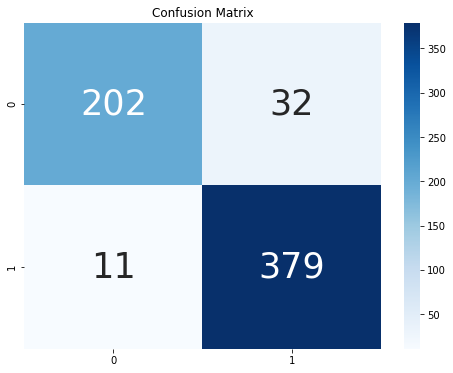

In [39]:
report(test_set.classes, y_pred)

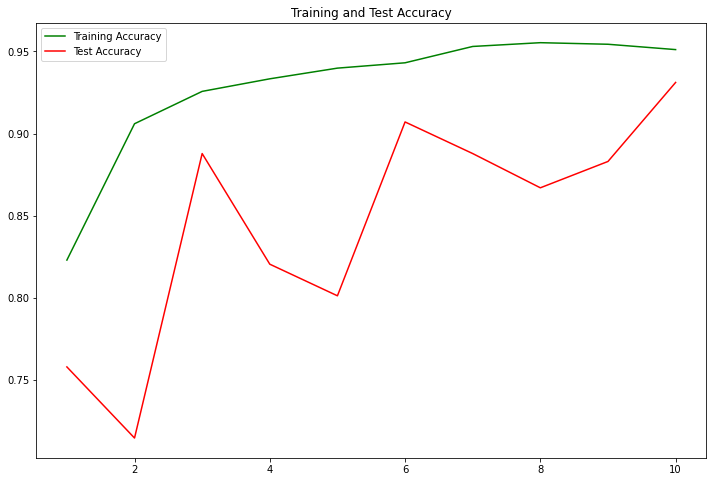

In [40]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         accuracy, 
         color = 'green',
         label = "Training Accuracy")
plt.plot(np.arange(1, epochs+1), 
         val_accuracy, 
         color = 'red',
         label = "Test Accuracy")
plt.legend()
plt.title("Training and Test Accuracy")
plt.show()

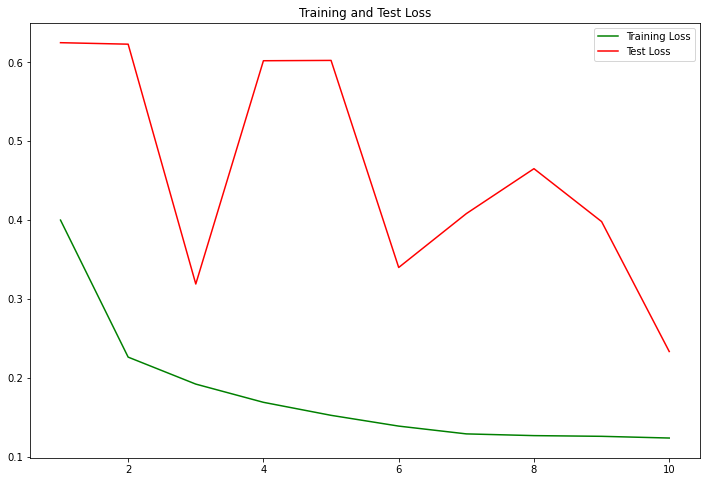

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         loss, 
         color = 'green',
         label = "Training Loss")
plt.plot(np.arange(1, epochs+1), 
         val_loss, 
         color = 'red',
         label = "Test Loss")
plt.legend()
plt.title("Training and Test Loss")
plt.show()

### More Testing

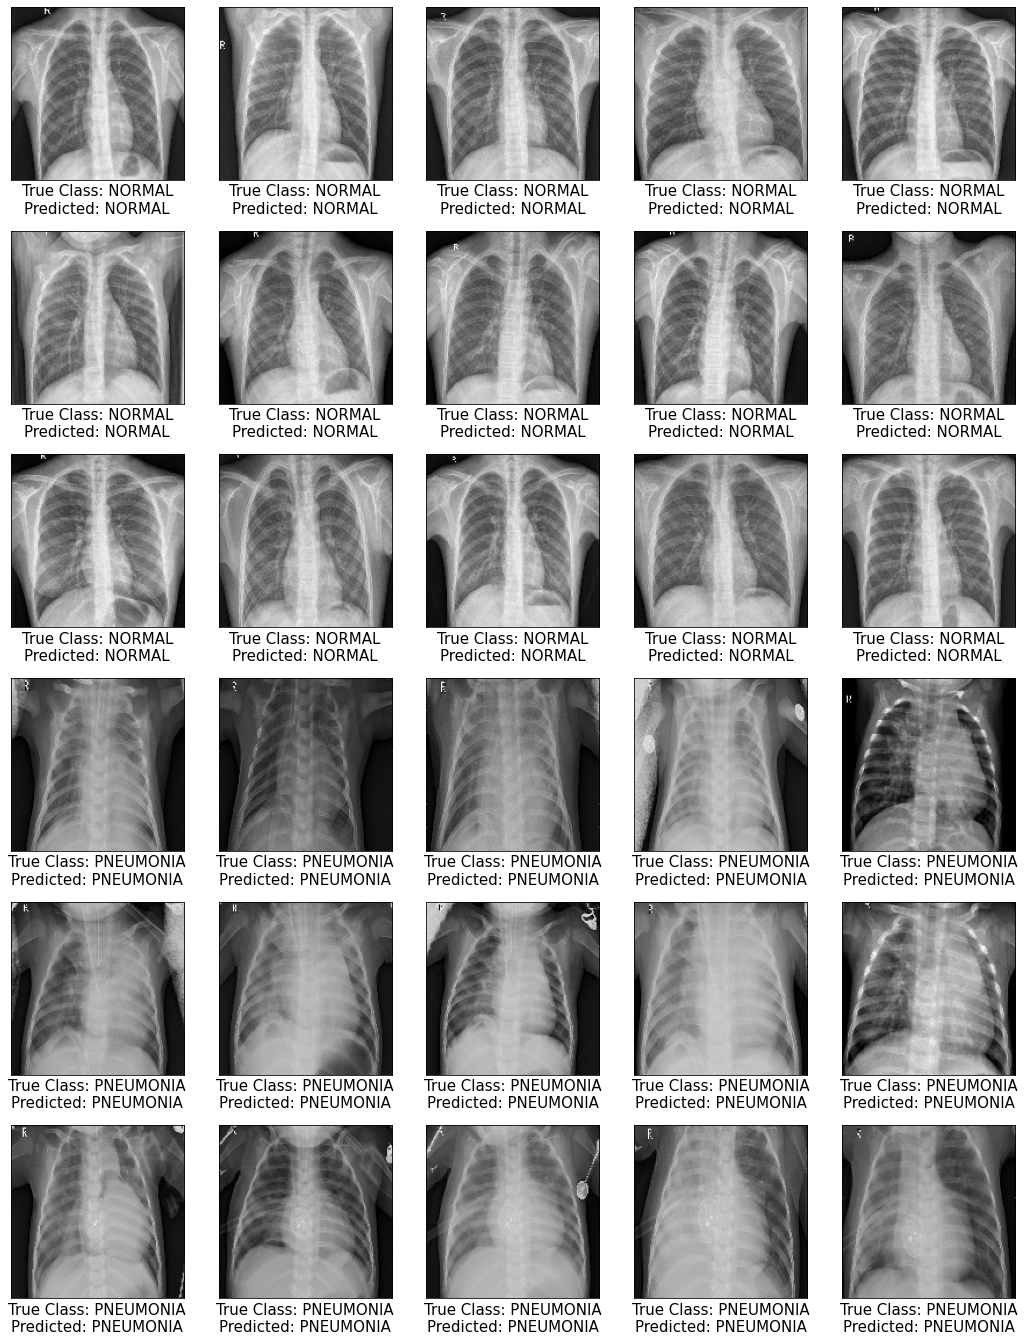

In [138]:
import matplotlib
matplotlib.rc('font', size=15)

plt.figure(figsize=(18, 24))

j = 1
for i in list(range(15)) + list(range(-15, 0)):
    plt.subplot(6, 5, j)
    plt.xticks([])
    plt.yticks([])

    lbl = int(labels[i])
    lbl_pred = int(y_sample[i])
    plt.xlabel('True Class: ' + str(encoding[lbl]) + '\nPredicted: ' + str(encoding[lbl_pred]))
    plt.imshow(images[i])

    j += 1
plt.show()

Accuracy:	0.984375
Precision:	0.9696969696969697
Recall:		1.0
F1:		0.9846153846153847




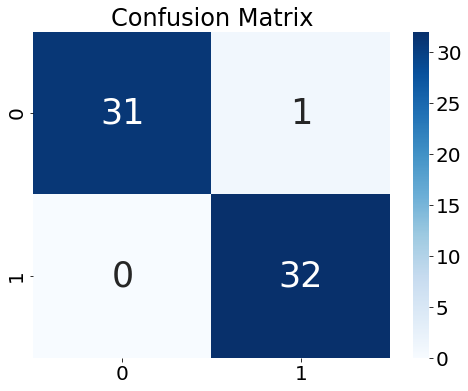

In [111]:
report(labels, y_sample)

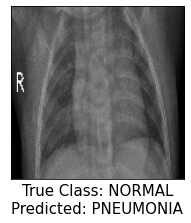

In [140]:
import matplotlib
matplotlib.rc('font', size=15)

plt.figure(figsize=(18, 24))

j= 1
for i in range(len(y_sample)):
    lbl = int(labels[i])
    lbl_pred = int(y_sample[i]) 

    if lbl != lbl_pred:
      plt.subplot(6, 5, j)
      plt.xticks([])
      plt.yticks([])
      plt.xlabel('True Class: ' + str(encoding[lbl]) + '\nPredicted: ' + str(encoding[lbl_pred]))
      plt.imshow(images[i])
      j += 1
plt.show()

In [142]:
# Saving the model
cnn.save('model.h5')